<a href="https://colab.research.google.com/github/aashrithresearch/Bone-Fractures/blob/main/bone_fracture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastai.callback.fp16 import *
import torch
import os
from google.colab import drive
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Bone_Fracture_Binary_Classification'

In [4]:
print(os.listdir(path))

['train', 'val', 'test']


In [5]:
print(os.listdir(path+'/train'))

['fractured', 'not fractured']


In [6]:
fractures = DataBlock(blocks = (ImageBlock, CategoryBlock),
                      get_items = get_image_files,
                      get_y = parent_label,
                      splitter = RandomSplitter(seed=42),
                      item_tfms = Resize(440),
                      batch_tfms = aug_transforms(size=224, min_scale=0.75))
dls = fractures.dataloaders(path+'/train', bs=64)

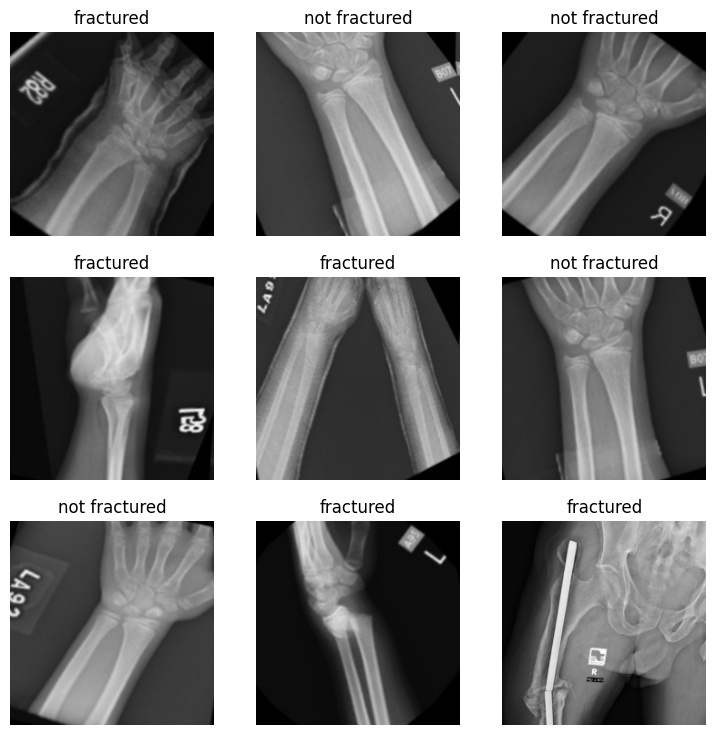

In [7]:
dls.show_batch(nrows=3, ncols=3)

In [10]:
learn34 = vision_learner(dls, resnet34, metrics=accuracy).to_fp16()
learn34.fine_tune(10, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,time
0,0.686766,0.229143,0.899494,24:57
1,0.326926,0.140494,0.937093,01:11
2,0.215874,0.071907,0.975416,01:15


epoch,train_loss,valid_loss,accuracy,time
0,0.080888,0.011217,0.998554,01:16
1,0.044232,0.010671,0.997108,01:17
2,0.043336,0.018538,0.997831,01:15
3,0.029436,0.026209,0.991323,01:14
4,0.014131,0.032941,0.994215,01:15
5,0.010436,0.002058,0.998554,01:15
6,0.013702,0.015868,0.995662,01:16
7,0.010475,0.004719,0.998554,01:15
8,0.003955,0.005284,0.998554,01:13
9,0.002784,0.004229,0.998554,01:19


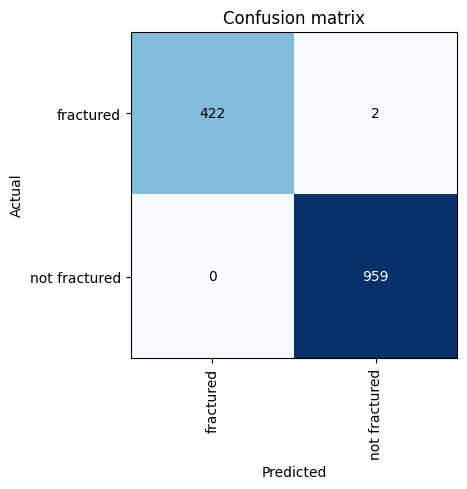

In [11]:
interp = ClassificationInterpretation.from_learner(learn34)
interp.plot_confusion_matrix()